<h2>Name : Brinda N</h2>

In [ ]:
import pandas as pd
import numpy as np

Loading the dataframe and displaying the first five rows

In [ ]:
data = pd.read_csv('41.csv')
data.head()

,name,region,cases,cases100k,cases7days,cases7days100k,cases24h,deaths,deaths100k,deaths7days,deaths7days100k,deaths24h
0,Czechia,Europe,56635613.0,17110.32,913428.0,275.96,146115.0,909950.0,274.91,15931.0,4.81,2446.0
1,Hungary,Europe,43862301.0,3178.41,192520.0,13.95,27491.0,582140.0,42.19,2312.0,0.17,350.0
2,Saint Vincent and the Grenadines,Americas,27827447.0,13091.61,151858.0,71.44,23141.0,775139.0,364.67,4186.0,1.97,685.0
3,Togo,Africa,10406234.0,15328.98,309552.0,455.98,51382.0,177719.0,261.79,976.0,1.44,158.0
4,El Salvador,Americas,9980696.0,6839.16,235129.0,161.12,35237.0,277389.0,190.07,8203.0,5.63,1211.0


Adding Fatality Rate Column

In [ ]:
data['fatalityrate'] = data['deaths']/data['cases'] * 100

In [ ]:
data.head()

,name,region,cases,cases100k,cases7days,cases7days100k,cases24h,deaths,deaths100k,deaths7days,deaths7days100k,deaths24h,fatalityrate
0,Czechia,Europe,56635613.0,17110.32,913428.0,275.96,146115.0,909950.0,274.91,15931.0,4.81,2446.0,1.606675
1,Hungary,Europe,43862301.0,3178.41,192520.0,13.95,27491.0,582140.0,42.19,2312.0,0.17,350.0,1.327199
2,Saint Vincent and the Grenadines,Americas,27827447.0,13091.61,151858.0,71.44,23141.0,775139.0,364.67,4186.0,1.97,685.0,2.785520
3,Togo,Africa,10406234.0,15328.98,309552.0,455.98,51382.0,177719.0,261.79,976.0,1.44,158.0,1.707813
4,El Salvador,Americas,9980696.0,6839.16,235129.0,161.12,35237.0,277389.0,190.07,8203.0,5.63,1211.0,2.779255


<ul>
<li>I have imported DictReader from the csv module</li>
<li>row is a dictionary which contains the column name as the key and  the corresponding entry as the value</li>
<li>Then I create a dictionary with the region name as the key and the number of cases reported in the last 24hours as the value</li>
<li>I use the seaborn library to plot a bar graph</li>
</ul>

In [ ]:
from csv import DictReader
import codecs
data_rdr = DictReader(codecs.iterdecode(open('41.csv','rb'),'utf-8'))
data_rows = [d for d in data_rdr]

In [ ]:
mydict = dict()
for row in data_rows:
    if row['region'] in mydict:
        mydict[row['region']] += float(row['cases24h'])
    else:
        mydict[row['region']] = float(row['cases24h'])

In [ ]:
mydict

{'Europe': 255186.0,
 'Americas': 140895.0,
 'Africa': 74957.0,
 'Eastern Mediterranean': 60649.0,
 'South-East Asia': 27157.0,
 'Western Pacific': 24388.0}

In [ ]:
l1 = mydict.keys()
l2 = mydict.values()
s1 = pd.Series(l1)
s2 = pd.Series(l2)

In [ ]:
s1

0                   Europe
1                 Americas
2                   Africa
3    Eastern Mediterranean
4          South-East Asia
5          Western Pacific
dtype: object

In [ ]:
s2

0    255186.0
1    140895.0
2     74957.0
3     60649.0
4     27157.0
5     24388.0
dtype: float64

In [ ]:
mydf = pd.DataFrame({'region':s1,'cases24h':s2})
mydf

,region,cases24h
0,Europe,255186.0
1,Americas,140895.0
2,Africa,74957.0
3,Eastern Mediterranean,60649.0
4,South-East Asia,27157.0
5,Western Pacific,24388.0


<h2>Visualization of case count over the last 24 hours for each region in a bar plot</h2>

[Text(0.5, 1.0, 'Case count over the last 24hours for each region')]

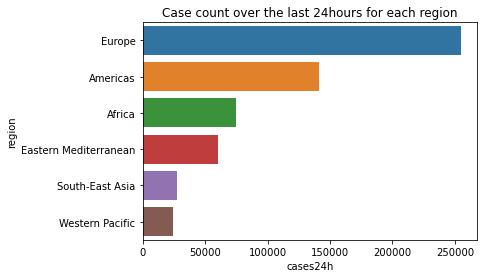

In [ ]:
import seaborn as sns
sns.barplot(data=mydf, x='cases24h', y='region').set(title='Case count over the last 24hours for each region')

<h2>Conclusion : The region which reported the highest number of cases in the last 24 hours is EUROPE and the region which reported the least number of cases in the last 24 hours is WEST PACIFIC</h2>

Adding Population column

In [ ]:
data['population'] = data['cases'] / data['cases100k'] * 100000
data.head(20)

,name,region,cases,cases100k,cases7days,cases7days100k,cases24h,deaths,deaths100k,deaths7days,deaths7days100k,deaths24h,fatalityrate,population
0,Czechia,Europe,56635613.0,17110.32,913428.0,275.96,146115.0,909950.0,274.91,15931.0,4.81,2446.0,1.606675,3.310027e+08
1,Hungary,Europe,43862301.0,3178.41,192520.0,13.95,27491.0,582140.0,42.19,2312.0,0.17,350.0,1.327199,1.380008e+09
2,Saint Vincent and the Grenadines,Americas,27827447.0,13091.61,151858.0,71.44,23141.0,775139.0,364.67,4186.0,1.97,685.0,2.785520,2.125594e+08
3,Togo,Africa,10406234.0,15328.98,309552.0,455.98,51382.0,177719.0,261.79,976.0,1.44,158.0,1.707813,6.788602e+07
4,El Salvador,Americas,9980696.0,6839.16,235129.0,161.12,35237.0,277389.0,190.07,8203.0,5.63,1211.0,2.779255,1.459345e+08
5,Egypt,Eastern Mediterranean,9515090.0,11281.95,262880.0,311.69,38823.0,84826.0,NaN,NaN,2.35,281.0,0.891489,8.433905e+07
6,Barbados,Americas,8827822.0,13573.04,34876.0,53.62,5828.0,148327.0,228.06,286.0,0.44,41.0,1.680222,6.503939e+07
7,Switzerland,Europe,NaN,8736.66,112571.0,134.02,15034.0,157796.0,187.86,2049.0,2.44,301.0,NaN,NaN
8,Bahamas,Americas,6806812.0,15060.73,10292.0,22.77,1661.0,149217.0,330.16,322.0,0.71,72.0,2.192172,4.519576e+07
9,Greenland,Europe,6429292.0,13583.22,12366.0,26.12,1002.0,112129.0,236.89,149.0,0.31,8.0,1.744033,4.733261e+07


<h2>Data Cleaning</h2>

Before Data Cleaning

In [ ]:
data.isnull().sum()

name                0
region              0
cases               2
cases100k           0
cases7days          4
cases7days100k      3
cases24h            0
deaths              1
deaths100k          2
deaths7days         2
deaths7days100k     3
deaths24h           0
fatalityrate       15
population         14
dtype: int64

In [ ]:
data.shape

(236, 14)

In [ ]:
popS = data['population']

In [ ]:
popS

0      3.310027e+08
1      1.380008e+09
2      2.125594e+08
3      6.788602e+07
4      1.459345e+08
           ...     
231             NaN
232             NaN
233             NaN
234             NaN
235             NaN
Name: population, Length: 236, dtype: float64

In [ ]:
for i in range(popS.shape[0]):
    if pd.isna(popS[i]):
        print(i)

7
77
224
225
226
227
228
229
230
231
232
233
234
235


In [ ]:
data.shape[0]

236

In [ ]:
data.iloc[0]

name                        Czechia
region                       Europe
cases                    56635613.0
cases100k                  17110.32
cases7days                 913428.0
cases7days100k               275.96
cases24h                   146115.0
deaths                     909950.0
deaths100k                   274.91
deaths7days                 15931.0
deaths7days100k                4.81
deaths24h                    2446.0
fatalityrate               1.606675
population         331002652.200543
Name: 0, dtype: object

In [ ]:
a = data.iloc[0]

In [ ]:
if (not pd.isna(a['deaths'])) & (not pd.isna(a['population'])):
    print('Yes')

Yes


In [ ]:
data.iloc[235]

name               Brunei Darussalam
region               Western Pacific
cases                            0.0
cases100k                        0.0
cases7days                       0.0
cases7days100k                   0.0
cases24h                         0.0
deaths                           0.0
deaths100k                       0.0
deaths7days                      0.0
deaths7days100k                  0.0
deaths24h                        0.0
fatalityrate                     NaN
population                       NaN
Name: 235, dtype: object

<ul>
<li>Step 1: Iterate over each row in the dataframe</li>
<li>Step 2: Check for missing value in particular column using pd.isna()</li>
<li>Step 3: Suppose a missing value is found in 18th row and under the column with the label cases7days. I will make sure that the population and cases7days100k values are not missing for that row.
</li>
<li>Step 4: Then I use the basic formula - population = cases7days/cases7days100k * 100000 to compute the required value</li>
</ul>


In [ ]:
for i in range(data.shape[0]):
    row = data.iloc[i]
    if pd.isna(row['cases7days']):
        if (not pd.isna(row['cases7days100k'])) & (not pd.isna(row['population'])):
            data.iloc[i,4] = row['cases7days100k'] * row['population']/100000
    if pd.isna(row['cases7days100k']):
        if (not pd.isna(row['cases7days'])) & (not pd.isna(row['population'])):
            data.iloc[i,5] = row['cases7days'] / row['population'] * 100000
    if pd.isna(row['deaths']):
        if (not pd.isna(row['deaths100k'])) & (not pd.isna(row['population'])):
            data.iloc[i,7] = row['deaths100k'] * row['population']/100000
    if pd.isna(row['deaths100k']):
        if (not pd.isna(row['deaths'])) & (not pd.isna(row['population'])):
            data.iloc[i,8] = row['deaths'] / row['population'] * 100000
    if pd.isna(row['deaths7days']):
        if (not pd.isna(row['deaths7days100k'])) & (not pd.isna(row['population'])):
            data.iloc[i,9] = row['deaths7days100k'] *row['population']/100000
    if pd.isna(row['deaths7days100k']):
        if (not pd.isna(row['deaths7days'])) & (not pd.isna(row['population'])):
            data.iloc[i,10] = row['deaths7days'] / row['population'] * 100000

<i>Let's check whether the values have been filled</i>

In [ ]:
data.head(20)

,name,region,cases,cases100k,cases7days,cases7days100k,cases24h,deaths,deaths100k,deaths7days,deaths7days100k,deaths24h,fatalityrate,population
0,Czechia,Europe,56635613.0,17110.32,913428.000000,275.96,146115.0,909950.0,274.910000,15931.000000,4.810000,2446.0,1.606675,3.310027e+08
1,Hungary,Europe,43862301.0,3178.41,192520.000000,13.95,27491.0,582140.0,42.190000,2312.000000,0.170000,350.0,1.327199,1.380008e+09
2,Saint Vincent and the Grenadines,Americas,27827447.0,13091.61,151858.000000,71.44,23141.0,775139.0,364.670000,4186.000000,1.970000,685.0,2.785520,2.125594e+08
3,Togo,Africa,10406234.0,15328.98,309552.000000,455.98,51382.0,177719.0,261.790000,976.000000,1.440000,158.0,1.707813,6.788602e+07
4,El Salvador,Americas,9980696.0,6839.16,235129.000000,161.12,35237.0,277389.0,190.070000,8203.000000,5.630000,1211.0,2.779255,1.459345e+08
5,Egypt,Eastern Mediterranean,9515090.0,11281.95,262880.000000,311.69,38823.0,84826.0,100.577366,1981.967789,2.350000,281.0,0.891489,8.433905e+07
6,Barbados,Americas,8827822.0,13573.04,34876.000000,53.62,5828.0,148327.0,228.060000,286.000000,0.440000,41.0,1.680222,6.503939e+07
7,Switzerland,Europe,NaN,8736.66,112571.000000,134.02,15034.0,157796.0,187.860000,2049.000000,2.440000,301.0,NaN,NaN
8,Bahamas,Americas,6806812.0,15060.73,10292.000000,22.77,1661.0,149217.0,330.160000,322.000000,0.710000,72.0,2.192172,4.519576e+07
9,Greenland,Europe,6429292.0,13583.22,12366.000000,26.12,1002.0,112129.0,236.890000,149.000000,0.310000,8.0,1.744033,4.733261e+07


In [ ]:
data.isnull().sum()

name                0
region              0
cases               2
cases100k           0
cases7days          1
cases7days100k      0
cases24h            0
deaths              0
deaths100k          0
deaths7days         0
deaths7days100k     0
deaths24h           0
fatalityrate       15
population         14
dtype: int64

In [ ]:
for j in range(data.shape[0]):
    row = data.iloc[j]
    if pd.isna(row['cases7days']):
        print(row)

name               Burundi
region              Africa
cases                  NaN
cases100k           390.67
cases7days             NaN
cases7days100k        5.83
cases24h               0.0
deaths             22691.0
deaths100k           22.17
deaths7days          277.0
deaths7days100k       0.27
deaths24h              0.0
fatalityrate           NaN
population             NaN
Name: 77, dtype: object


In [ ]:
for j in range(data.shape[0]):
    row = data.iloc[j]
    if pd.isna(row['population']):
        print(row)

name               Switzerland
region                  Europe
cases                      NaN
cases100k              8736.66
cases7days            112571.0
cases7days100k          134.02
cases24h               15034.0
deaths                157796.0
deaths100k              187.86
deaths7days             2049.0
deaths7days100k           2.44
deaths24h                301.0
fatalityrate               NaN
population                 NaN
Name: 7, dtype: object
name               Burundi
region              Africa
cases                  NaN
cases100k           390.67
cases7days             NaN
cases7days100k        5.83
cases24h               0.0
deaths             22691.0
deaths100k           22.17
deaths7days          277.0
deaths7days100k       0.27
deaths24h              0.0
fatalityrate           NaN
population             NaN
Name: 77, dtype: object
name               Martinique
region               Americas
cases                     0.0
cases100k                 0.0
cases7days           

<ul>
<li>I will replace the missing <b>population</b> values using the formula <b>population = deaths/deaths100k * 100000</b></li>
<li>Then I will replace cases and cases7days values</li>
</ul>

In [ ]:
for i in range(data.shape[0]):
    row = data.iloc[i]
    if pd.isna(row['cases']):
        if (not pd.isna(row['deaths'])) & (not pd.isna(row['deaths100k'])):
            data.iloc[i,13] = row['deaths'] / row['deaths100k'] * 100000

In [ ]:
data.isnull().sum()

name                0
region              0
cases               2
cases100k           0
cases7days          1
cases7days100k      0
cases24h            0
deaths              0
deaths100k          0
deaths7days         0
deaths7days100k     0
deaths24h           0
fatalityrate       15
population         12
dtype: int64

In [ ]:
for i in range(data.shape[0]):
    row = data.iloc[i]
    if pd.isna(row['cases']):
        if(not pd.isna(row['cases100k'])) & (not pd.isna(row['population'])):
            data.iloc[i,2] = row['cases100k'] * row['population'] / 100000
    if pd.isna(row['cases7days']):
        if(not pd.isna(row['cases7days100k'])) & (not pd.isna(row['population'])):
            data.iloc[i,4] = row['cases7days100k'] * row['population'] / 100000


In [ ]:
data.isnull().sum()

name                0
region              0
cases               0
cases100k           0
cases7days          0
cases7days100k      0
cases24h            0
deaths              0
deaths100k          0
deaths7days         0
deaths7days100k     0
deaths24h           0
fatalityrate       15
population         12
dtype: int64

In [ ]:
data['fatalityrate'] = data['deaths']/data['cases'] * 100

In [ ]:
data.isnull().sum()

name                0
region              0
cases               0
cases100k           0
cases7days          0
cases7days100k      0
cases24h            0
deaths              0
deaths100k          0
deaths7days         0
deaths7days100k     0
deaths24h           0
fatalityrate       12
population         12
dtype: int64

<p>Now the only NaN values remaining are the ones in population and fatalityrate columns which I will fill with <b>zero</b> because
data in the other columns is zero in the original dataframe</p>

In [ ]:
data['population'].fillna(0,inplace=True)
data['fatalityrate'].fillna(0,inplace=True)

After Data Cleaning

In [ ]:
data.isnull().sum()

name               0
region             0
cases              0
cases100k          0
cases7days         0
cases7days100k     0
cases24h           0
deaths             0
deaths100k         0
deaths7days        0
deaths7days100k    0
deaths24h          0
fatalityrate       0
population         0
dtype: int64

<h2>Finding Critical Countries</h2>
<p>Code iterates over each row in the dataframe and checks whether the cases reported in last 24 hours is greater than 50 percent 
of the cases reported in the last 7 days</p>

In [ ]:
critical = []
for i in range(data.shape[0]):
    row = data.iloc[i]
    if row['cases24h'] > 50/100 * row['cases7days']:
        critical.append(row['name'])

In [ ]:
print(len(critical))

2


In [ ]:
for i, d in enumerate(critical):
    print(i, d)

0 Cyprus
1 Malawi


In [ ]:
data.head(20)

,name,region,cases,cases100k,cases7days,cases7days100k,cases24h,deaths,deaths100k,deaths7days,deaths7days100k,deaths24h,fatalityrate,population
0,Czechia,Europe,5.663561e+07,17110.32,913428.000000,275.96,146115.0,909950.0,274.910000,15931.000000,4.810000,2446.0,1.606675,3.310027e+08
1,Hungary,Europe,4.386230e+07,3178.41,192520.000000,13.95,27491.0,582140.0,42.190000,2312.000000,0.170000,350.0,1.327199,1.380008e+09
2,Saint Vincent and the Grenadines,Americas,2.782745e+07,13091.61,151858.000000,71.44,23141.0,775139.0,364.670000,4186.000000,1.970000,685.0,2.785520,2.125594e+08
3,Togo,Africa,1.040623e+07,15328.98,309552.000000,455.98,51382.0,177719.0,261.790000,976.000000,1.440000,158.0,1.707813,6.788602e+07
4,El Salvador,Americas,9.980696e+06,6839.16,235129.000000,161.12,35237.0,277389.0,190.070000,8203.000000,5.630000,1211.0,2.779255,1.459345e+08
5,Egypt,Eastern Mediterranean,9.515090e+06,11281.95,262880.000000,311.69,38823.0,84826.0,100.577366,1981.967789,2.350000,281.0,0.891489,8.433905e+07
6,Barbados,Americas,8.827822e+06,13573.04,34876.000000,53.62,5828.0,148327.0,228.060000,286.000000,0.440000,41.0,1.680222,6.503939e+07
7,Switzerland,Europe,7.338497e+06,8736.66,112571.000000,134.02,15034.0,157796.0,187.860000,2049.000000,2.440000,301.0,2.150250,8.399659e+07
8,Bahamas,Americas,6.806812e+06,15060.73,10292.000000,22.77,1661.0,149217.0,330.160000,322.000000,0.710000,72.0,2.192172,4.519576e+07
9,Greenland,Europe,6.429292e+06,13583.22,12366.000000,26.12,1002.0,112129.0,236.890000,149.000000,0.310000,8.0,1.744033,4.733261e+07


<h3>Comparison between Americas and Europe</h3>

In [ ]:
d1 = {'cases':0,'deaths':0}        
d2 = {'cases':0,'deaths':0}

for i in range(data.shape[0]):
    row = data.iloc[i]
    if row['region'] == 'Europe':
        d1['cases'] += row['cases']
        d1['deaths'] += row['deaths']
    if row['region'] == 'Americas':
        d2['cases'] += row['cases']
        d2['deaths'] += row['deaths']
    

In [ ]:
d1

{'cases': 151315453.76014054, 'deaths': 2485714.759615755}

In [ ]:
s3 = pd.Series(d1)

In [ ]:
s3

cases     1.513155e+08
deaths    2.485715e+06
dtype: float64

In [ ]:
d2

{'cases': 87102488.0, 'deaths': 2291487.0}

In [ ]:
s4 = pd.Series(d2)

In [ ]:
s4

cases     87102488.0
deaths     2291487.0
dtype: float64

In [ ]:
compare_df = pd.DataFrame({'Europe':d1,'Americas':d2})

In [ ]:
compare_df

,Europe,Americas
cases,1.513155e+08,87102488.0
deaths,2.485715e+06,2291487.0


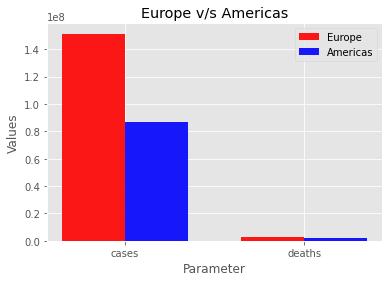

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
n = 2
eur = compare_df['Europe']
amer = compare_df['Americas']
fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.35
opacity = 0.9
ax.bar(index, eur, bar_width, alpha=opacity, color='r',
                label='Europe')
ax.bar(index+bar_width, amer, bar_width, alpha=opacity, color='b',
                label='Americas')
ax.set_xlabel('Parameter')
ax.set_ylabel('Values')
ax.set_title('Europe v/s Americas')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('cases','deaths'))
ax.legend()
plt.show()

<h1>Conclusion : Europe has been affected worse than Americas as we can see from the graph that the overall number of cases and deaths is higher in Europe</h1>